In [1]:
import requests as rq
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
DATA_LOG_FILE = "sensorTracks_Sat_15_11_2025"
REAR_SENSOR_NODE_DATA = "https://project-gxxr-default-rtdb.firebaseio.com/{0}/rear_brake_gps.json".format(DATA_LOG_FILE)
FRONT_SENSOR_NODE_DATA = "https://project-gxxr-default-rtdb.firebaseio.com/{0}/front_imu.json".format(DATA_LOG_FILE)

In [3]:
rear_sensor_data = rq.get(REAR_SENSOR_NODE_DATA).json()
front_sensor_data = rq.get(FRONT_SENSOR_NODE_DATA).json()

df_rear_data = pd.DataFrame.from_dict(rear_sensor_data, orient="index")
df_front_data = pd.DataFrame.from_dict(front_sensor_data, orient="index")

In [4]:
df_rear_data.head()

,gps,node,rear_mm,s1,time
1763202932_6932983,"{'alt': 1487.5, 'fix': 1, 'lat': -17.806995, '...",rear_brake_gps,93.0,27.99,1.763203e+09
1763202932_695074,"{'alt': 1487.5, 'fix': 1, 'lat': -17.806995, '...",rear_brake_gps,93.0,27.99,1.763203e+09
1763202932_6961432,"{'alt': 1487.5, 'fix': 1, 'lat': -17.806995, '...",rear_brake_gps,93.0,27.99,1.763203e+09
1763202932_7000144,"{'alt': 1487.5, 'fix': 1, 'lat': -17.806995, '...",rear_brake_gps,93.0,27.99,1.763203e+09
1763202932_7013905,"{'alt': 1487.5, 'fix': 1, 'lat': -17.806995, '...",rear_brake_gps,93.0,27.99,1.763203e+09


In [5]:
df_rear_data.drop(columns=["gps","node"], inplace=True)

In [6]:
df_rear_data["time"] = pd.to_datetime(df_rear_data["time"], unit="s", utc=True)
df_rear_data = df_rear_data.set_index("time").sort_index()
df_rear_data = df_rear_data.dropna()

In [7]:
df_plot = df_rear_data.resample("500ms").mean()
#df_plot = data_rear_data
df_rear_data.head()

,rear_mm,s1
time,,
2025-11-15 10:35:32.693298340+00:00,93.0,27.99
2025-11-15 10:35:32.695074081+00:00,93.0,27.99
2025-11-15 10:35:32.696143150+00:00,93.0,27.99
2025-11-15 10:35:32.700014353+00:00,93.0,27.99
2025-11-15 10:35:32.701390505+00:00,93.0,27.99


In [8]:
df_front_data["time"] = pd.to_datetime(df_front_data["time"], unit="s", utc=True)
df_front_data = df_front_data.set_index("time").sort_index()
df_front_data = df_front_data.dropna()

df_front_data = df_front_data.drop(columns=["imu", "node", "seq"])
df_front_data.head()

,sonar
time,
2025-11-15 10:35:32.692596912+00:00,"{'cm': 4.29, 'echo_us': 250, 'mm': 42.9}"
2025-11-15 10:35:32.722410440+00:00,"{'cm': 4.24, 'echo_us': 247, 'mm': 42.4}"
2025-11-15 10:35:32.722943783+00:00,"{'cm': 4.29, 'echo_us': 250, 'mm': 42.9}"
2025-11-15 10:35:32.736760855+00:00,"{'cm': 4.29, 'echo_us': 250, 'mm': 42.9}"
2025-11-15 10:35:32.752419472+00:00,"{'cm': 4.29, 'echo_us': 250, 'mm': 42.9}"


In [9]:
df_front_suspension_expanded = df_front_data["sonar"].apply(pd.Series)
df_front_suspension_expanded.head()

,cm,echo_us,mm
time,,,
2025-11-15 10:35:32.692596912+00:00,4.29,250.0,42.9
2025-11-15 10:35:32.722410440+00:00,4.24,247.0,42.4
2025-11-15 10:35:32.722943783+00:00,4.29,250.0,42.9
2025-11-15 10:35:32.736760855+00:00,4.29,250.0,42.9
2025-11-15 10:35:32.752419472+00:00,4.29,250.0,42.9


In [10]:
df_plot_front_suspension = df_front_suspension_expanded.resample("500ms").mean()

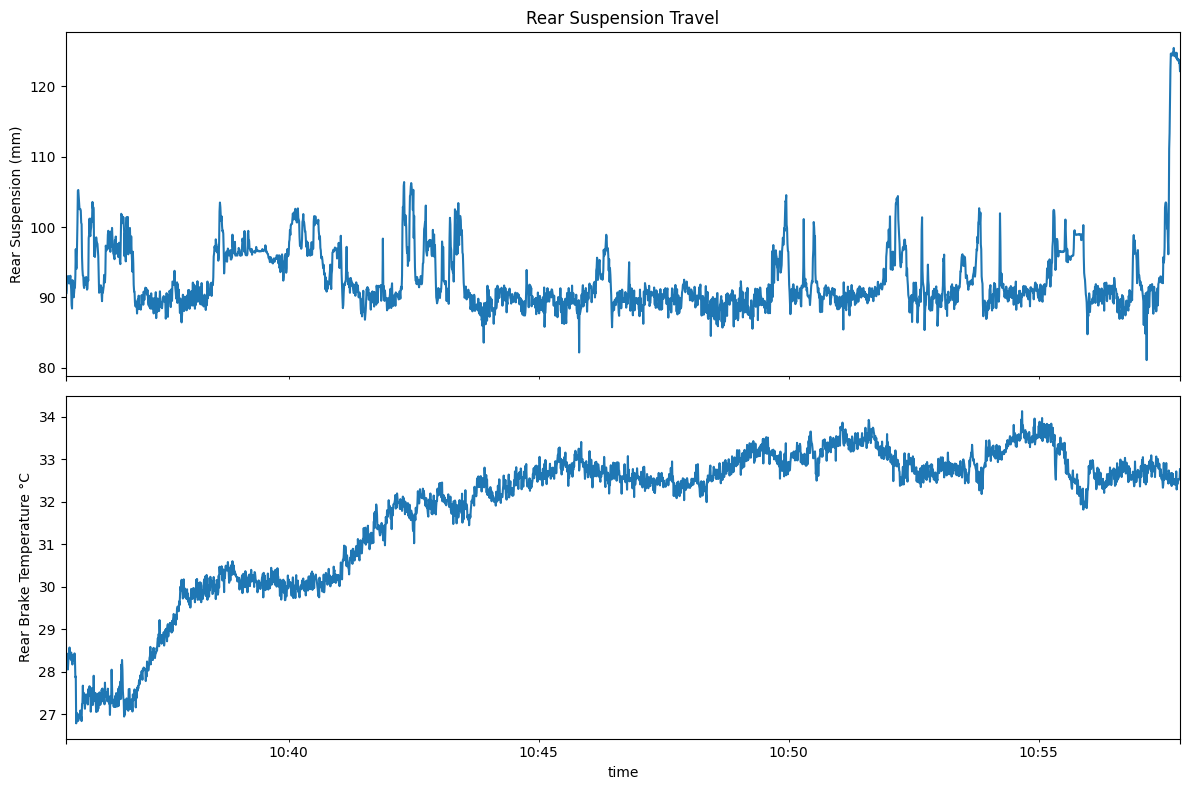

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
axs[0].set_title("Rear Suspension Travel")

df_plot["rear_mm"].plot(ax=axs[0])
axs[0].set_ylabel("Rear Suspension (mm)")

df_plot["s1"].plot(ax=axs[1])
axs[1].set_ylabel("Rear Brake Temperature °C")

axs[1].set_xlabel("time")

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Front Suspension'}, xlabel='time'>

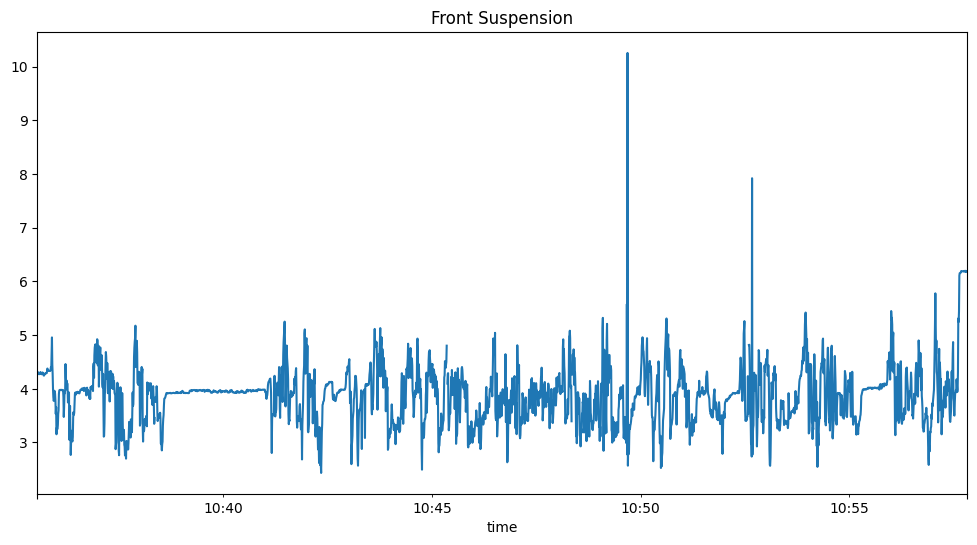

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(12,6), sharex=True)

axs.set_title("Front Suspension")

df_plot_front_suspension["cm"].plot(ax=axs)
